In [1]:
# TITLE: Key Remapping on Wayland
# COVER: https://i.imgur.com/9IIsZ10.png
# DATE: 2020-07-01
# TAGS: key remapping,c-hjkl
import graphviz

Investing in keyboards has been one of my favorite productivity hacks as a programmer and also a hobby for quite some time. What I currently use is the HHKB(Happy Hacking Keyboard). I love the light touch and the quiet yet satisfying keystroke sound this keyboard makes. If you want one for yourself, this seems to be one of the most recent product of theirs: [Amazon Link](https://www.amazon.com/HHKB-Professional-Hybrid-Type-S-PD-KB800BS/dp/B082TYNNL2)

Even though I've been loving this keyboard for many years, there is one minor problem with this one. This keyboard doesn't have arrow keys! As an emacs user, I don't need arrow keys as much as one would need on more modern code editors, but this is still a problem because emacs isn't the only application I run on my computer. The arrow keys hidden behind the fn key makes web browsing/gaming painful.

While I was looking for a solution for this problem when I first bought this keyboard, I realized that a lot of people tend to remap keys like Ctrl + h/j/k/l to arrow keys so that the arrow keys are more accessible. Among the solutions I found on Google, I chose to use [AutoKey](https://github.com/autokey/autokey) because other solutions seemed either too complex or fragile to my taste. It wasn't perfect but it worked for me for a while. All you have to do is just to define macros in Python for each key combination you want to override.

However, this happy path didn't last forever. It stopped working right after I switched from Xorg to Wayland. AutoKey doesn't support Wayland as of today (2020/07/01), and it seemed like there aren't any alternatives that satisfy my needs. So really the options I had at that point were either to go back to Xorg, or to improvise. And of course, I chose to improvise! I wrote a simple Rust application that intercepts all keyboard events and replaces it with the combination I want, and replays it onto a virtual keyboard (uinput). 

Here's the link to the Github repository if you want to check it out: https://github.com/stewartpark/c-hjkl

The following diagram explains the gist of how this application works:

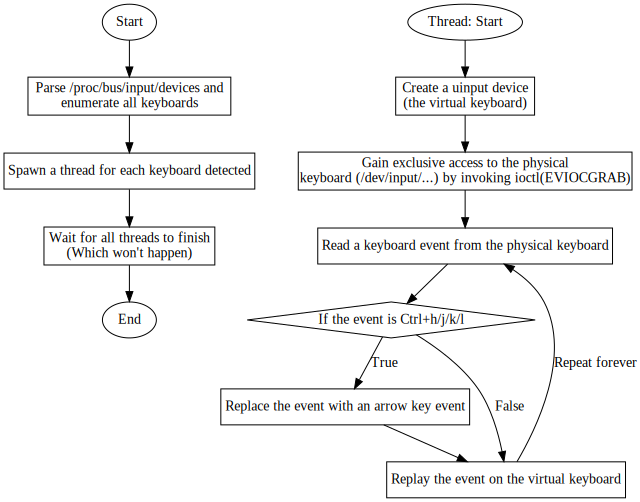

In [2]:
graphviz.Source("""
digraph {
 start -> enumerate_keyboards -> spin_up_threads -> join_threads -> end;
 thread1 -> create_uinput1 -> grab_events1 -> read_events1 -> if1;
 
 if1 -> replace_events1 [label="True"];
 if1 -> replay_events1 [label="False"];
 replace_events1 -> replay_events1;
 replay_events1 -> read_events1 [label="Repeat forever"];
 
 start[label="Start"]; end[label="End"];
 join_threads[shape="rectangle",label="Wait for all threads to finish\n(Which won't happen)"];
 enumerate_keyboards[shape="rectangle",label="Parse /proc/bus/input/devices and \nenumerate all keyboards"];
 spin_up_threads[shape="rectangle",label="Spawn a thread for each keyboard detected"];
 thread1[label="Thread: Start"];
 create_uinput1[shape=rectangle,label="Create a uinput device\n(the virtual keyboard)"];
 grab_events1[shape="rectangle",label="Gain exclusive access to the physical\nkeyboard (/dev/input/...) by invoking ioctl(EVIOCGRAB)"];
 read_events1[shape=rectangle,label="Read a keyboard event from the physical keyboard"];
 if1[shape=diamond,label="If the event is Ctrl+h/j/k/l"];
 replace_events1[shape=rectangle,label="Replace the event with an arrow key event"];
 replay_events1[shape=rectangle,label="Replay the event on the virtual keyboard"];
}
""")

I made this as a systemd service on my laptop and it's been working great. There are some annoying things I want to fix later, like having to restart the service if you plug in a new keyboard, etc, but I'm pretty happy with what I have right now. It even works on console!

Right now there isn't a nice way for others to install this, so that's another thing to do in my list.

I hope you enjoyed my unusual solution to the key remapping problem on Linux.